In [1]:
import pysam
from pysam import VariantFile as vcf
import operator
from math import log2
import pandas as pd
from pandas import DataFrame as dataframe
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import pdist, squareform
import scipy
import  os
import os.path
import matplotlib.colors as mcolors
from scipy import stats
import csv

In [2]:
fileName = '../1000_population.tsv'


lines = []
categories = ["All"]
samplenames=[]

with open(fileName, 'r') as f:
    text = f.read()

lines = text.split('\n')
for l in lines:
    samplenames.append(l.split('\t')[0])
    categories.append(l.split('\t')[-1])
allcategories=sorted(list(set(categories)))


In [3]:
def random_colors(num_colors):
    random_colors = []
    for _ in range(num_colors):
        random_color = list(np.random.rand(3))
        random_colors.append(random_color)
    return random_colors
#27 random color
num_colors = 27
color_list = random_colors(num_colors)
color_list

[[0.9219293305134149, 0.17540000524832466, 0.36131366222377537],
 [0.3043268823177119, 0.0353747039775707, 0.6637027546363631],
 [0.22328920705471744, 0.7865281797203443, 0.23115484423538535],
 [0.6552910940305458, 0.9730593974799521, 0.10995197337741958],
 [0.26181858447562345, 0.28395966636456726, 0.7130664934337054],
 [0.267352159800764, 0.6699365822318807, 0.35248845787482375],
 [0.4712032575713778, 0.7028976696077899, 0.0005737328354022964],
 [0.4283974788208833, 0.5150061086827423, 0.8110540126828194],
 [0.7846389187194476, 0.24140880046709423, 0.4771874355981518],
 [0.6381002331248306, 0.8695019619346973, 0.4389480899562783],
 [0.9526949141788686, 0.21188997806640597, 0.35846216836745615],
 [0.8745569117054296, 0.4656720095889083, 0.6091454650753088],
 [0.5308457362845154, 0.9257836202472569, 0.5381927011347503],
 [0.3406523274256732, 0.01873524356071188, 0.5845723609635693],
 [0.5639300214676735, 0.2342916046007577, 0.08040998377609765],
 [0.4685583891657418, 0.5538997166362315

In [4]:
len(allcategories)

27

In [5]:
#pic2
mhc_pos_path="../csvfiles/posmhc.csv"
df_mhc_pos_path=pd.read_csv(mhc_pos_path)
df_race_pos=pd.read_csv("../race/mhc.csv")

In [7]:

mhc_race_positions_dict={'ACB': {'mhc': [[32589647, 32805573]]},
  'All':{'mhc':[[32453110, 32577355], [32589647, 32716541]]},                       
 'ASW': {'mhc': [[29753369, 29913914],
   [29939668, 30120966],
   [32627859, 32843772]]},
 'BEB': {},
 'CDX': {'mhc': [[31295439, 31432528]]},
 'CEU': {'mhc': [[32627859, 32776791]]},
 'CHB': {},
 'CHS': {'mhc': [[32589647, 32716541]]},
 'CLM': {'mhc': [[32453110, 32577355], [32589647, 32732048]]},
 'ESN': {'mhc': [[29720403, 29896285], [32644320, 32843772]]},
 'FIN': {},
 'GBR': {'mhc': [[32453110, 32577355]]},
 'GIH': {'mhc': [[32589647, 32698571]]},
 'GWD': {'mhc': [[29720403, 29913914],
   [29939668, 30085606],
   [32627859, 32732048]]},
 'IBS': {'mhc': [[32453110, 32577355], [32589647, 32716541]]},
 'ITU': {'mhc': [[32423532, 32554290]]},
 'JPT': {'mhc': [[32589647, 32732048]]},
 'KHV': {'mhc': [[32453110, 32577355], [32589647, 32716541]]},
 'LWK': {'mhc': [[32627859, 32805573]]},
 'MSL': {'mhc': [[29720403, 29913914],
   [31317765, 31528792],
   [32554291, 32776791]]},
 'MXL': {'mhc': [[32589647, 32716541]]},
 'PEL': {'mhc': [[32473902, 32616414]]},
 'PJL': {},
 'PUR': {'mhc': [[32589647, 32683157]]},
 'STU': {'mhc': [[32453110, 32577355], [32589647, 32716541]]},
 'TSI': {'mhc': [[32589647, 32698571]]},
 'YRI': {'mhc': [[29720403, 29913914],
   [29939668, 30120966],
   [32589647, 32882258]]}}

In [8]:
zipped_color_list=dict(zip(allcategories,color_list))
zipped_color_list

{'ACB': [0.9219293305134149, 0.17540000524832466, 0.36131366222377537],
 'ASW': [0.3043268823177119, 0.0353747039775707, 0.6637027546363631],
 'All': [0.22328920705471744, 0.7865281797203443, 0.23115484423538535],
 'BEB': [0.6552910940305458, 0.9730593974799521, 0.10995197337741958],
 'CDX': [0.26181858447562345, 0.28395966636456726, 0.7130664934337054],
 'CEU': [0.267352159800764, 0.6699365822318807, 0.35248845787482375],
 'CHB': [0.4712032575713778, 0.7028976696077899, 0.0005737328354022964],
 'CHS': [0.4283974788208833, 0.5150061086827423, 0.8110540126828194],
 'CLM': [0.7846389187194476, 0.24140880046709423, 0.4771874355981518],
 'ESN': [0.6381002331248306, 0.8695019619346973, 0.4389480899562783],
 'FIN': [0.9526949141788686, 0.21188997806640597, 0.35846216836745615],
 'GBR': [0.8745569117054296, 0.4656720095889083, 0.6091454650753088],
 'GIH': [0.5308457362845154, 0.9257836202472569, 0.5381927011347503],
 'GWD': [0.3406523274256732, 0.01873524356071188, 0.5845723609635693],
 'IBS'

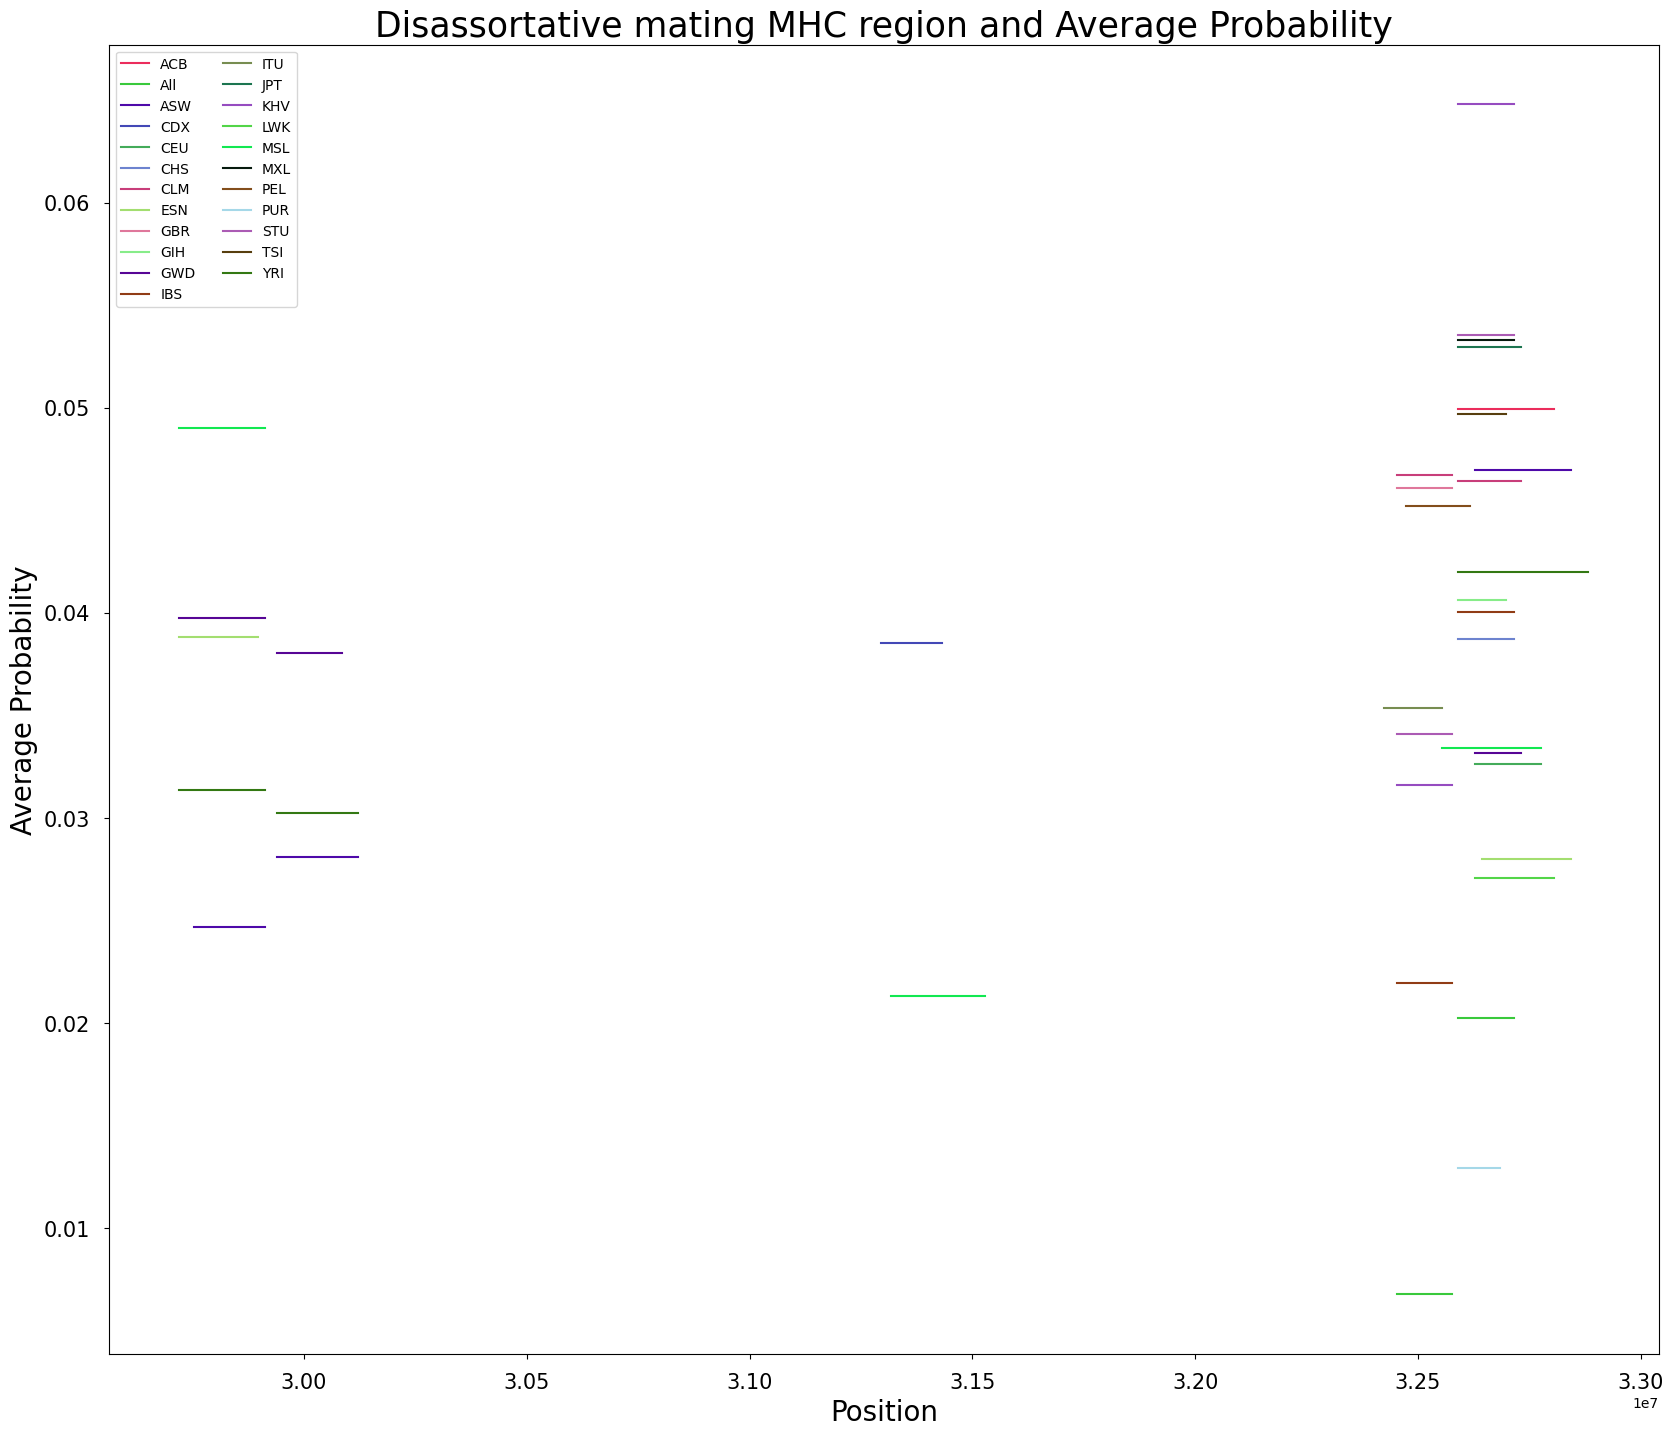

In [12]:

#{race:p-average}
result_dict=dict()
for k,vs in mhc_race_positions_dict.items():
    middledict=dict()
    if vs:
        if k=="All":            
            for v in vs["mhc"]:
                pos_P_list=df_mhc_pos_path[(df_mhc_pos_path["Unnamed: 0"]>=v[0]) & (df_mhc_pos_path["Unnamed: 0"]<=v[1])]["P"].to_list()
                #print(pos_P_list)
                middledict[tuple(v)]=np.mean(pos_P_list)
            
                result_dict[k]=middledict#{race:{[start1,end1]:average1,[start2,end2]:average2,[start3,end3]:average3}}
        else:
            for v in vs["mhc"]:
                pos_P_list=df_race_pos[(df_race_pos["Unnamed: 0"]>=v[0]) & (df_race_pos["Unnamed: 0"]<=v[1])][k].to_list()
                #print(pos_P_list)
                middledict[tuple(v)]=np.mean(pos_P_list)
            
                result_dict[k]=middledict#{race:{[start1,end1]:average1,[start2,end2]:average2,[start3,end3]:average3}}
            

seen_races=set()
for race,middledict_items in result_dict.items():

    for region,ava in middledict_items.items():
        x=[region[0],region[1]]
        y=[ava,ava]
        plt.plot(x, y, color=zipped_color_list[race])
        if race not in seen_races:
            plt.plot([], [], color=zipped_color_list[race], label=race)
            seen_races.add(race)
            


plt.tick_params(axis='both', which='major', labelsize=15,pad=10) 
# plt.scatter(x_values1, y_values1,s=1)
plt.title("Disassortative mating MHC region and Average Probability",fontsize=25)
plt.xlabel("Position",fontsize=20)
plt.ylabel("Average Probability",fontsize=20)
plt.rcParams["figure.figsize"] = (20,17)

plt.legend(loc='upper left',fontsize=10,ncol=2)
plt.plot()
plt.savefig("../formalfigs/pic2_05_05.png",dpi=300)

